zeta 함수의 출력 :
[[ 1.25783683]
 [ 2.74511383]
 [ 7.71189098]
 [ 9.11634928]
 [ 7.13668246]
 [10.43809857]]
sigmoid_list 함수의 출력 값:
[[0.77865351]
 [0.9396368 ]
 [0.99955273]
 [0.99989016]
 [0.99920525]
 [0.99997071]]


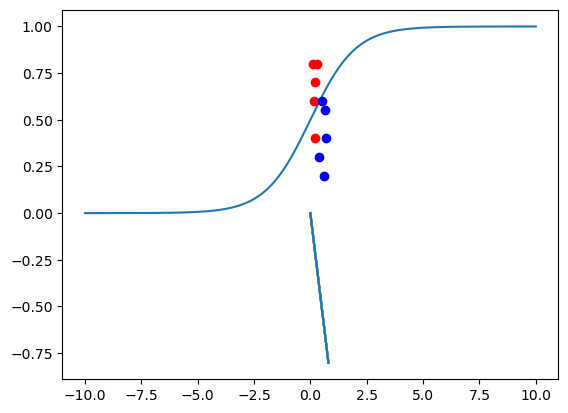

In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def sigmoid_list(x_list):
    y = 1 / (1 + np.exp(-x_list))
    return y

x_list = np.arange(-10, 10.01, 0.01)
plt.plot(x_list, sigmoid_list(x_list))

# ann_data.csv 파일을 불러와서 df 객체로 저장
df = pd.read_csv('ann_data.csv')

# df 출력
df

w = [0.5, 0.5]
b = 0

def visualize(df,w,b):
    for idx in range(len(df)):
        
        x1_1 = 0
        y1_1 = (-w[0]*x1_1-b)/w[1]
        
        x1_2 = 0.8
        y1_2 = (-w[0]*x1_2-b)/w[1]
        
        # plot samples
        if df.iloc[idx,2] == 1:
            plt.plot(df.iloc[idx,0],df.iloc[idx,1],'bo')
        else:
            plt.plot(df.iloc[idx,0],df.iloc[idx,1],'ro')
            
        #plot classifier
        
        plt.plot([x1_1,x1_2],[y1_1,y1_2])
        
visualize(df,w,b)


def zeta(w, b, x1, x2):
    z = np.zeros((6, 1))

    for idx in range(6):
        z[idx] = np.dot(w[idx, :], np.array([x1, x2])) + b[idx]

    return z

# 가중치 w 설정하기 
w = np.random.rand(6, 2)

# 편향 b 설정하기
b = np.random.rand(6, 1)

# x1, x2 값 설정하기 (임의의 값)
x1 = 10
x2 = 4

# zeta 함수 호출하기
z = zeta(w, b, x1, x2)

# sigmoid_list 함수에 zeta 함수 출력값 대입하기
sigmoid_list_output = sigmoid_list(z)

# 결과 출력하기
print("zeta 함수의 출력 :")
print(z)
print("sigmoid_list 함수의 출력 값:")
print(sigmoid_list_output)



In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def zeta(w, b, X):
    return np.dot(w.T, X) + b

def update_parameters(w, b, X, y, learning_rate):
    m = len(y)
    
  
    z = zeta(w, b, X)
    y_pred = sigmoid(z)
    
    
    dz = y_pred - y
    dw = np.dot(X, dz.T) / m
    db = np.sum(dz) / m
    
    # 파라미터 업데이트
    w = w - learning_rate * dw
    b = b - learning_rate * db
    
    return w, b

# Load data
df = pd.read_csv('ann_data.csv')

# 데이터 추출하기
X = np.array(df.iloc[:, :2]).T
y = np.array(df.iloc[:, 2])

# 초기 parameter값 설정
w = np.array([0.5, 0.5]).reshape(-1, 1)
b = 0

# Learning rate
learning_rate = 0.2

# 반복횟수 설정하기
iterations = 5000

for i in range(iterations):
    # Update parameters using gradient descent
    w, b = update_parameters(w, b, X, y, learning_rate)


